In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
Housing_Data = pd.read_csv('/content/sample_data/california_housing_train.csv')
Housing_Data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [45]:
mean = Housing_Data.total_rooms.mean()
standard_deviation = Housing_Data.total_rooms.std()
total_rooms = Housing_Data.total_rooms
total_rooms_normalized = (total_rooms - mean) / standard_deviation

In [48]:
x = total_rooms_normalized #feature
y = Housing_Data.median_house_value #target

In [63]:
print(x.shape , y.shape)

(17000,) (17000,)


In [22]:
# Initialize parameters
w = 0  # weight (slope)
b = 0  # bias (intercept)

### Define the Model

$$
ŷ = wx+b
$$

In [18]:
#LR Model
def predict(w, x, b):
  return w * x + b

### Define the Cost Function

$$
J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2
$$


In [19]:
#Cost function (MSE)
def cost_function(w, x, y, b):
  total_cost = 0
  for i in range(m):
    total_cost += (predict(x[i], w, b)) ** 2
  return total_cost / (2 * m)

### Compute Gradients

$$
\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} (f_w(x^{(i)}) - y^{(i)}) x^{(i)}
$$

$$
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (f_w(x^{(i)}) - y^{(i)})
$$


In [33]:
#Compute gradients
def compute_gradients(x, y, w, b):
  m = len(x)
  dw = 0
  db = 0
  for i in range(m):
    dw += (predict(x[i], w, b) - y[i]) * x[i]
    db += (predict(x[i], w, b) - y[i])

  dw /= m
  db /= m

  return dw, db

### Update Parameters (Gradient Descent)

$$
w = w - α • ∂J/∂w
$$
$$
b = b - α • ∂J/∂b
$$

In [34]:
#Gradient descent function
def gradient_descent(x, y, w, b, alpha, epochs):
  for i in range(epochs):
    dw, db = compute_gradients(x, y, w, b)
    w -= alpha * dw
    b -= alpha * db

  return w, b

In [51]:
#Training parameters
alpha = 0.001
epochs = 1000

#Train the model
w_final, b_final = gradient_descent(x, y, w, b, alpha, epochs)
print(f'Final weights: w = {w_final}, b = {b_final}')

Final weights: w = 9606.200710943946, b = 131077.3153299179


In [65]:
#Test data
Test_Data = pd.read_csv("/content/sample_data/california_housing_test.csv")
Test_Data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [64]:
test_mean = Test_Data.total_rooms.mean()
test_standard_deviation = Test_Data.total_rooms.std()
total_test_rooms = Test_Data.total_rooms
test_rooms_normalized = (total_rooms - test_mean) / test_standard_deviation

In [66]:
#Prediction on new data
x_new = test_rooms_normalized
y_pred = predict(x_new, w_final, b_final)
# for i in range(len(x_new)):
#   print(f'Predicted y for x = {x_new[i]}: {y_pred[i]}')


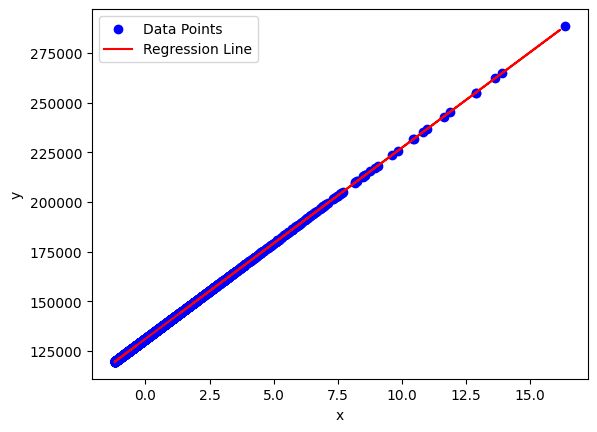

In [62]:
import matplotlib.pyplot as plt

plt.scatter(x_new, y_pred, color='blue', label='Data Points')

y_pred_line = predict(x, w_final, b_final)
plt.plot(x, y_pred_line, color='red', label='Regression Line')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()